<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>


---

## Домашнее задание 2: библиотека Numpy и линейная алгебра


Импортируем библиотеки:

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import ndimage  # спецификатор для работы с изображениями
from scipy import misc
import scipy.stats as sps

from PIL import Image

%matplotlib inline

*Вопросы для самопроверки:*
1. Что такое NumPy?
2. Зачем используется и почему работает быстрее?
3. Что такое линейная алгебра?
4. Как она связана с машинным обучением и глубоким обучением?

### Задание 1

В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета numpy и с ним.

In [34]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((2000,2000))
b = np.random.sample((2000,2000))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
# тут можно писать код 
# ========
print(a)
print(b)

[[0.63702335 0.5255321  0.77062918 ... 0.42404281 0.15142488 0.07292662]
 [0.35234678 0.21059173 0.14693305 ... 0.29762946 0.88799203 0.37705977]
 [0.41118104 0.97384738 0.3804003  ... 0.69072884 0.49070453 0.57993521]
 ...
 [0.0341204  0.51165008 0.27399142 ... 0.18719796 0.96943419 0.0836574 ]
 [0.56823934 0.53673792 0.36854556 ... 0.76711723 0.55692838 0.25949287]
 [0.26249329 0.83018621 0.20883916 ... 0.06792126 0.22491165 0.64581983]]
[[0.94622127 0.35218829 0.26851339 ... 0.75354302 0.43280897 0.71575424]
 [0.93694901 0.33289769 0.00616161 ... 0.67643216 0.47902749 0.90316826]
 [0.93250428 0.23091784 0.67766979 ... 0.61987325 0.32906361 0.46746823]
 ...
 [0.37957899 0.96702425 0.46030505 ... 0.71674356 0.58131849 0.80300367]
 [0.77169518 0.52959093 0.29159687 ... 0.25477593 0.62718461 0.53558665]
 [0.85566062 0.76406772 0.97338442 ... 0.44226603 0.51242999 0.48690733]]


In [35]:
def mult(a, b):
    # здесь напишите перемножение матриц без 
    # использования NumPy и выведите результат 
    c = np.zeros([a.shape[0],b.shape[1]])
    
    for i in range(a.shape[0]):
        
        for j in range(b.shape[1]):
            
            c[i,j] = np.dot(a[i,:],b[:,j])
            
    print(c)
    pass

In [36]:
def np_mult(a, b):
    # здесь напишите перемножение матриц с
    # использованием NumPy и выведите результат
    
    c = a.dot(b)
    
    print(c)
    pass

In [37]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

[[509.99241024 506.24048217 497.71286278 ... 499.83953862 496.19586747
  503.0539936 ]
 [498.65616823 505.78849648 504.7675663  ... 507.23841454 497.80098563
  506.93354383]
 [488.86840891 498.25005298 486.74776517 ... 500.04065669 495.79931721
  492.11011982]
 ...
 [507.06543722 511.68347838 494.30102577 ... 508.38730538 500.80328079
  499.6029237 ]
 [514.37641736 515.56868775 490.55536905 ... 510.16783494 499.36824848
  500.8875001 ]
 [499.02977867 499.3559866  488.15847771 ... 498.01509587 490.73494232
  487.35875241]]
Wall time: 49.7 s


In [38]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

[[509.99241024 506.24048217 497.71286278 ... 499.83953862 496.19586747
  503.0539936 ]
 [498.65616823 505.78849648 504.7675663  ... 507.23841454 497.80098563
  506.93354383]
 [488.86840891 498.25005298 486.74776517 ... 500.04065669 495.79931721
  492.11011982]
 ...
 [507.06543722 511.68347838 494.30102577 ... 508.38730538 500.80328079
  499.6029237 ]
 [514.37641736 515.56868775 490.55536905 ... 510.16783494 499.36824848
  500.8875001 ]
 [499.02977867 499.3559866  488.15847771 ... 498.01509587 490.73494232
  487.35875241]]
Wall time: 300 ms


### Задание 2

Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.
Аналогично -- с помощью библиотеки NumPy и без нее. Сравните скорость, объясните результат.

In [49]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    # Ваш код здесь
    S = np.cumsum(A)/(np.arange(A.shape[0])+1)
    
    return S
    
    pass

In [50]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    for i in range(len(A)):
        # Ваш код здесь
        S[i] = sum(A[:i+1]) / (i+1)
        
    #for i in range(len(A)):
        # Ваш код здесь
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 4) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 0 ns
Wall time: 4.06 s


0.0

### Задание 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив $X$ с преобразованным $X$ и вывести в обратном порядке.

In [213]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    
    # Ваш код здесь
    
    Y = np.zeros(X.shape[0])
    
    Y[1::2] = a
    
    Y[::2] = np.flip(X[::2]) ** 3

    return Y

In [214]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a = 1):
    
    # Ваш код здесь
    
    Y = np.zeros(X.shape[0])
    
    for i in range(X.shape[0]):
        
        if i % 2 != 0:
            
            Y[i] = a
            
        else:
                
            if X.shape[0] % 2 == 0:
                
                Y[i] = X[X.shape[0] - i - 2] ** 3
                
            else:
                
                Y[i] = X[X.shape[0] - i - 1] ** 3
    
    return Y

In [217]:
X = sps.uniform.rvs(size=10 ** 7) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 226 ms
Wall time: 4.72 s


0.0

Что вы можете сказать о скорости вычислений в `NumPy`? Ответ обоснуйте.

**Ответ:**

### Задание 4

Вам подаются на вход два вектора `a` и `b` в трехмерном пространстве.Заполните их случайными числами. Реализуйте их скалярное произведение с помощью  `NumPy` и без. Засеките время работы, как это показано в заданиях выше.

In [265]:
c = 100000
a = sps.uniform.rvs(size=c)  #тут ваш код
b = sps.uniform.rvs(size=c)  #тут ваш код

In [255]:
def stupid_scalar_product(a,b):
    
    #тут ваш код
    
    if a.shape[0] == b.shape[0]:
        
        c = []
        
        for i in range(a.shape[0]):
            
            c.append(a[i]*b[i])
            
        c = sum(c)
        
    else:
        
        c = 0
    
    return c

In [256]:
def numpy_scalar_product(a,b):
    
    #тут ваш код
    
    if a.shape[0] == b.shape[0]:
        
        c = np.dot(a, b)
        
    else:
        
        c = 0
    
    return c

In [268]:
%time product_1 = stupid_scalar_product(a,b)
%time product_2 = numpy_scalar_product(a,b)
# проверим корректность:
np.abs(product_1 - product_2).sum()

Wall time: 37.1 ms
Wall time: 473 µs


5.093170329928398e-11

### Задание 5*

Нужно написать матричное произведение БЕЗ циклов и БЕЗ символа @, БЕЗ `np.dot` и вообще БЕЗ какой-либо вспомогательной функции из `numpy`, то есть пользуясь только индексированием, взятем суммы по нужным осям и поэлементным произведенем (да, это возможно). Рекомендуем гуглить по запросу "NumPy broadcasting"

In [0]:
def cool_matrix_product(A, B):
    # Ваш код здесь

In [0]:
# тут проверьте, что всё правильно перемножается

Ваш код не будет проверяться нами непосредственно, однако это очень и очень полезное упражнение.

## Бонусная часть (в тесте вопросов по ней не будет)

Image = 2-D численный массив
(или 3-D: CT, MRI, 2D + time; 4-D, …)
В текущем задании, image == Numpy array (np.array)

In [346]:
pic = misc.face()  # встроенная в библиотеку функция, которая загружает картинку с енотом

In [347]:
pic

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

Выведите тип и размеры для переменной pic. Что лежит внутри?

In [348]:
print(type(pic), pic.shape)

<class 'numpy.ndarray'> (768, 1024, 3)


Если вы все сделали правильно, что для формы у вас выведется кортеж из трех чисел: (X, Y, 3). Предположите, откуда там 3?

**Ответ:**

С помощью функции ниже можно вывести изображение и посмотреть, что находится внутри:

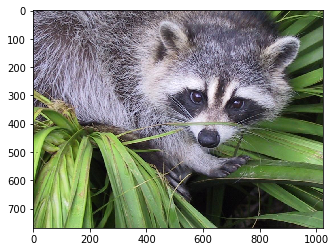

In [349]:
plt.imshow(pic)

Убедитесь, что внутри массива `pic` действительно лежат числа. Выведите первые 10 записей.
Массив состоит из троек чисел, которые характеризуют глубину цвета для каждого пикселя. Из пикселей складывается картинка.

In [350]:
print(pic[0:10])

[[[121 112 131]
  [138 129 148]
  [153 144 165]
  ...
  [119 126  74]
  [131 136  82]
  [139 144  90]]

 [[ 89  82 100]
  [110 103 121]
  [130 122 143]
  ...
  [118 125  71]
  [134 141  87]
  [146 153  99]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]
  ...
  [117 126  71]
  [133 142  87]
  [144 153  98]]

 ...

 [[ 68  68  80]
  [ 70  69  83]
  [ 67  66  80]
  ...
  [117 141  81]
  [120 146  85]
  [123 149  88]]

 [[102 102 114]
  [ 94  94 106]
  [ 85  84  98]
  ...
  [109 137  78]
  [ 98 126  67]
  [ 91 119  60]]

 [[123 123 135]
  [116 116 128]
  [108 108 120]
  ...
  [ 55  84  26]
  [ 47  76  18]
  [ 44  73  15]]]


In [354]:
pic.min()

0

Выведите значение максимального элемента в матрице. Выведите значение минимального. Выведите среднее по всем элементам матрице. В каких пределах лежат значения глубины цветов?

In [355]:
print(pic.max(), pic.min())

255 0


### Задание 2

Теперь загрузим черно-белое изображение енота, чтобы наш массив был не 3-х мерным тензором, а двумерным массивом. Тензоры обрабатываются точно также, но для простоты пока что давайте работать с двумерными массивами, т.е. матрицами.

In [361]:
pic = misc.face(gray=True)

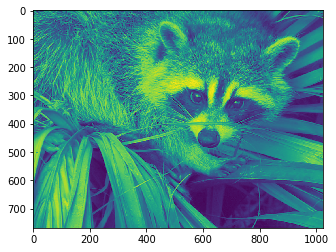

In [368]:
plt.imshow(pic)

In [369]:
plt.imshow(#тут ваш код)

SyntaxError: unexpected EOF while parsing (<ipython-input-369-683d8a97343a>, line 1)

Выведите форму (shape) полученной картинки `pic`. Какие выводы можно сделать? Положите в `h`,`w` высоту и ширину картинки.

In [0]:
print(#тут ваш код)
h,w=#тут ваш код

Используя библиотеку `numpy`, отразите изображение по горизонтали. Выведите картинку.

Подсказка: не забывайте, что изображения -- это просто двумерные массивы

In [0]:
#тут ваш код

Теперь давайте повысим контрастность -- для этого к каждому пикселю прибавим 50 единиц

In [0]:
#тут ваш код

In [0]:
plt.imshow(pic)

Теперь давайте попробуем превратить наше одноканальное изображение в трехканальный (RGB) тензор. Для этого вместо каждого пикселя в одноканальном изображении (в двумерном массиве) поставим кортеж из трех элементов -- глубины красного, зеленого и голубого соотвественно. Восстановить по ч/б картинке цветной мы не можем, так как мы не можем взять утерянную информацию из ниоткуда, но можем усилить черные и белые участки. Для этого давайте заполним все три канала одинаковыми значениями, деленными на что-то очень большое. Например $--$ на $200$.  То есть, например, если в пикселе `pic[i][j]` лежало значение **200**, то для нового изображения `new_pic` мы заполняем `new_pic[i][j]` кортежем из трех чисел `int(pic[i][j]/3)`. Функция `int` $--$ округление до целой части.

In [0]:
new_pic = np.zeros((h,w,3)) #создадим пустую матрицу, куда будем записывать значения
for i in range(h):
    for j in range(w):
     #тут ваш код

In [0]:
plt.imshow(#тут ваш код)

### Задание 3

Теперь давайте уменьшим качество картинки в 16 раз, путем уменьшения качества изображения, т.е. теперь 16 пикселей по близости надо заполнить одним значением.

In [0]:
from sklearn.datasets import load_sample_image #импорт загрузчика изображения

In [0]:
china = load_sample_image('china.jpg')
plt.imshow(china)

Запишите в переменные `h`, `w`, `c` высоту, ширину, количество каналов соответственно для картинки `china`.

In [0]:
h, w, c = #тут ваш код

Теперь давайте непосредственно перейдем к изменению картинки $--$ мы предлагаем разбивать картинки на квадраты 4 на 4 и заполнять все 16 значений внутри квадрата левым верхним значением. Вы можете сделать иначе.

In [0]:
from copy import copy
compressed_pic = copy(china)
#тут ваш код     

Напишите функцию, которая считает несоотвествие между исходной и сжатой картинкой. Запустите ваш код для `compressed_pic`, `china`

In [0]:
def calculate_mismatch(a,b):
    mismatch=0
    #тут ваш код
    print(mismatch)

In [0]:
calculate_mismatch(#тут ваш код)

Посчитайте синус от каждого значения пикселей изображения `china` по всем каналам. Выведите картинку. Используйте функцию `np.sin` 

In [0]:
#тут ваш код

In [0]:
plt.imshow(#тут ваш код) 

Посмотрите на полученный результат. Как вы думаете, что можно делать с помощью такого преобразования? Какого рода объекты можно распознать?

### Задание 4*

Теперь давайте поработаем с аудиофайлами. Стандартный аудиофайл представляет собой обычный набор чисел, в котором хранятся значения частот, снятых с определенной периодичностью. Итак, самая простая аудиодорожка $-$ одномерный массив.

Первое, что нужно сделать $--$ установить библиотеку для работы с аудио. Она называется `librosa`. Гайд по установке: https://librosa.github.io/librosa/install.html


In [0]:
import librosa #импортируем библиотеку
import IPython.display

In [0]:
audio, sr= librosa.load('Test.wav')  
# записываем наш массив звуковых частот в файл аудио, sr -- число точек, записываемых в секунду. 
# чтобы файл открылся, он должен лежать в той же папке, что и файл HW_2.ipynb

Нашу дорожку можно воспроизвести в самом файле `.ipynb`:

In [0]:
IPython.display.Audio(audio, rate=sr)

Выведите тип данных переменной `audio`, найдите ее длительность и среднее.

In [0]:
print(#тут ваш код)

    Давайте посмотрим, как выглядит наша дорожка. Для этого используем библиотеку `matplotlib.pyplot`

In [0]:
plt.figure(figsize=(25,5))
plt.title('Test.wav')
plt.plot(audio)

Обрежьте последние 4 секунды файла

In [0]:
audio = #тут ваш код

Давайте уменьшим амплитуду на 25%. Что при этом изменится? Напоминаю, что вы всегда можете послушать изменения при помощи `IPython.display.Audio`

In [0]:
audio = #тут ваш код

А еще аудиодорожку можно ускорить. Для этого попробуйте потюнить параметр `rate`

In [0]:
IPython.display.Audio(audio, rate=sr)